In [ ]:
!kaggle datasets download sehriyarmemmedli/turboaz-cars-project
!unzip turboaz-cars-project.zip

In [ ]:
#Datasetin mueyyen hissesini goturmek ucun
import pandas as pd

df = pd.read_csv("cars.csv")

df_sample = df.sample(frac=0.1, random_state=42)

print(f"Orijinal veri boyutu: {df.shape}")
print(f"Örnek veri boyutu: {df_sample.shape}")


Orijinal veri boyutu: (653721, 56)
Örnek veri boyutu: (65372, 56)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("cars.csv")

In [ ]:
df = df.copy()

In [ ]:
print(df.head(3))

                                   id_x                        car_rel_url_x  \
0  3c234145-d57a-4ad6-9448-d43810fc3392           /autos/8748840-hyundai-i30   
1  c74ea36f-6be1-4de4-926d-e117197dcf00  /autos/8475807-lada-vaz-niva-travel   
2  9cefceb0-024d-4581-a869-a3c2c68a9f95   /autos/8739686-toyota-land-cruiser   
3  459cc337-fb63-48de-9694-41554923d311       /autos/8712597-hyundai-elantra   
4  6c5ee8d8-1c6f-4fad-a694-957a4c43c25d          /autos/8674773-toyota-prius   

                 datetime_scrape                    name  price_x currency_x  \
0  2024-09-13 20:32:19.751157+00             Hyundai i30  15000.0        AZN   
1  2024-09-13 20:32:19.751157+00  LADA (VAZ) Niva Travel  23700.0        AZN   
2  2024-09-13 20:32:19.751157+00     Toyota Land Cruiser  35600.0          $   
3  2024-09-13 20:32:19.751157+00         Hyundai Elantra  26700.0        AZN   
4  2024-09-13 20:32:19.751157+00            Toyota Prius  10500.0        AZN   

    datetime_product  city         day

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653721 entries, 0 to 653720
Data columns (total 56 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id_x                      653721 non-null  object 
 1   car_rel_url_x             653721 non-null  object 
 2   datetime_scrape           653721 non-null  object 
 3   name                      653721 non-null  object 
 4   price_x                   653721 non-null  float64
 5   currency_x                653721 non-null  object 
 6   datetime_product          653721 non-null  object 
 7   city                      653721 non-null  object 
 8   day                       653721 non-null  object 
 9   hour                      653721 non-null  object 
 10  attributes                653721 non-null  object 
 11  production_year           653721 non-null  int64  
 12  engine_displacement_num   653721 non-null  float64
 13  engine_displacement_unit  647933 non-null  o

In [ ]:
print(df.isnull().sum())

id_x                             0
car_rel_url_x                    0
datetime_scrape                  0
name                             0
price_x                          0
currency_x                       0
datetime_product                 0
city                             0
day                              0
hour                             0
attributes                       0
production_year                  0
engine_displacement_num          0
engine_displacement_unit      5788
kilometrage_num                  0
kilometrage_unit              5788
barter                      428168
loan                        490381
salon                       460382
spare_parts                 651959
vip                         364780
featured                    489886
img_url                          0
id_y                             0
cars_id                          0
car_rel_url_y                    0
datetime                         0
description                  15529
price_y             

In [ ]:
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 0


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653721 entries, 0 to 653720
Data columns (total 56 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id_x                      653721 non-null  object 
 1   car_rel_url_x             653721 non-null  object 
 2   datetime_scrape           653721 non-null  object 
 3   name                      653721 non-null  object 
 4   price_x                   653721 non-null  float64
 5   currency_x                653721 non-null  object 
 6   datetime_product          653721 non-null  object 
 7   city                      653721 non-null  object 
 8   day                       653721 non-null  object 
 9   hour                      653721 non-null  object 
 10  attributes                653721 non-null  object 
 11  production_year           653721 non-null  int64  
 12  engine_displacement_num   653721 non-null  float64
 13  engine_displacement_unit  647933 non-null  o

In [ ]:
df.drop(columns=[
    'id_x', 'id_y', 'car_rel_url_x', 'car_rel_url_y',
    'datetime_scrape', 'hour', 'day', 'attributes',
    'barter', 'loan', 'salon', 'spare_parts',
    'vip', 'featured', 'img_url',
    'owner_name', 'shop_name', 'phone', 'description',
    'vin'
], inplace=True)

In [ ]:
print(df.describe())

             price_x  production_year  engine_displacement_num  \
count  653721.000000    653721.000000            653721.000000   
mean    31630.966437      1995.886897                 2.221417   
std     28679.360855       188.793547                 1.266334   
min       500.000000         0.000000                 0.000000   
25%     16800.000000      2009.000000                 1.600000   
50%     25300.000000      2015.000000                 2.000000   
75%     36800.000000      2019.000000                 2.500000   
max    940000.000000      2024.000000               120.000000   

       kilometrage_num        price_y          views  Buraxılış ili  
count     6.537210e+05  653721.000000  653721.000000  653721.000000  
mean      1.565231e+05   31630.917933    3740.731827    2013.797752  
std       1.458949e+05   28679.394420   10299.032842       7.646318  
min       0.000000e+00     500.000000      12.000000    1938.000000  
25%       5.502200e+04   16800.000000     432.000000   

In [ ]:
print(df.dtypes)

name                         object
price_x                     float64
currency_x                   object
datetime_product             object
city                         object
production_year               int64
engine_displacement_num     float64
engine_displacement_unit     object
kilometrage_num               int64
kilometrage_unit             object
cars_id                      object
datetime                     object
price_y                     float64
currency_y                   object
updated                      object
views                         int64
car_details_id_x             object
Ban növü                     object
Buraxılış ili                 int64
Hansı bazar üçün yığılıb     object
Marka                        object
Model                        object
Mühərrik                     object
Qəzalı                       object
Rəng                         object
Sahiblər                     object
Sürətlər qutusu              object
Vəziyyəti                   

In [ ]:
#price_x ve price_y da olan deyerler bir biri ile muqayise edildi.
if (df['price_x'] == df['price_y']).all():
    print("Bütün setirlerde price_x ve price_y eynidir")
else:
    print("Bezi setirlerde price-x ve price_y ferqlidir.")


Bazı satırlarda price_x ve price_y farklı! Farklı olanları kontrol edin.


In [ ]:
df[df['price_x'] != df['price_y']]

,name,price_x,currency_x,datetime_product,city,production_year,engine_displacement_num,engine_displacement_unit,kilometrage_num,kilometrage_unit,...,Sürətlər qutusu,Vəziyyəti,Yeni,Yerlərin sayı,Yürüş,Ötürücü,Şəhər,car_details_id_y,car_rel_url,extra_info
1413,Mercedes E 320,18500.0,AZN,"Xırdalan, dünən 18:52",xırdalan,2003,3.2,L,322000,km,...,Avtomat,"Vuruğu yoxdur, rənglənməyib",Xeyr,5,322 000 km,Arxa,Xırdalan,cb220b67-ddde-44e7-b528-e5e4c5762fc4,/autos/8782239-mercedes-e-320,Yüngül lehimli disklər* ABS* Lyuk* Yağış senso...
3677,Toyota Land Cruiser Prado,34700.0,AZN,"Bakı, dünən 13:53",bakı,2009,2.7,L,172500,km,...,Avtomat,"Vuruğu yoxdur, rənglənməyib",Xeyr,7,172 500 km,Tam,Bakı,d41982d5-822f-4a71-8dfd-2dd438ac31d0,/autos/8752943-toyota-land-cruiser-prado,Yüngül lehimli disklər* ABS* Yağış sensoru* Mə...
4604,Renault Megane,8300.0,AZN,"Goranboy, dünən 12:25",goranboy,2006,1.5,L,302300,km,...,Mexaniki,"Vuruğu yoxdur, rənglənib",Xeyr,5,302 300 km,Ön,Goranboy,f16eaeca-1ece-4a97-9bdc-566a7dd8189a,/autos/8781107-renault-megane,Yüngül lehimli disklər* ABS* Lyuk* Yağış senso...
7107,Toyota Camry,28500.0,AZN,"Bakı, dünən 23:58",bakı,2017,2.5,L,72000,km,...,Avtomat,"Vuruğu yoxdur, rənglənməyib",Xeyr,5,72 000 km,Ön,Bakı,29f76363-a7c0-49d0-a636-7dae2ef1a493,/autos/8785119-toyota-camry,Yüngül lehimli disklər* ABS* Lyuk* Yağış senso...
14813,Hyundai Avante,22900.0,AZN,"Bakı, dünən 20:22",bakı,2015,1.6,L,78100,km,...,Robot,"Vuruğu yoxdur, rənglənməyib",Xeyr,5,78 100 km,Ön,Bakı,35ff4866-53cc-45f2-85e0-5a1cfc07c378,/autos/8773194-hyundai-avante,Yüngül lehimli disklər* ABS* Mərkəzi qapanma* ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643414,Tofas Sahin,5700.0,AZN,"Bakı, dünən 12:20",bakı,2004,1.6,L,220000,km,...,Mexaniki,"Vuruğu yoxdur, rənglənməyib",Xeyr,5,220 000 km,Arxa,Bakı,56953d7b-7824-45d1-857a-d08317e3e976,/autos/9062353-tofas-sahin,Yüngül lehimli disklər* Mərkəzi qapanma
648019,LADA (VAZ) 2112,6500.0,AZN,"Şəmkir, dünən 22:45",şəmkir,2006,1.6,L,150000,km,...,Mexaniki,"Vuruğu yoxdur, rənglənməyib",Xeyr,5,150 000 km,Ön,Şəmkir,8004cdef-bb15-435b-bccd-bffb7e6d4ea8,/autos/9084137-lada-vaz-2112,Yüngül lehimli disklər
649678,Chevrolet Cruze,16500.0,AZN,"Bakı, dünən 14:40",bakı,2013,1.4,L,238439,km,...,Avtomat,"Vuruğu yoxdur, rənglənməyib",Xeyr,5,238 439 km,Ön,Bakı,e0ead9ad-936a-45a6-82a4-9d5a2c1ce2f1,/autos/9076340-chevrolet-cruze,Yüngül lehimli disklər* ABS* Mərkəzi qapanma* ...
651590,Toyota Prius,17500.0,AZN,"Bakı, dünən 11:57",bakı,2013,1.8,L,605113,km,...,Variator,"Vuruğu yoxdur, rənglənməyib",Xeyr,5,605 113 km,Ön,Bakı,31d20621-82b8-4dcc-82e2-c6bda6d868d3,/autos/9082582-toyota-prius,Yüngül lehimli disklər* ABS* Yağış sensoru* Mə...


In [ ]:
if (df['currency_x'] == df['currency_y']).all():
    print("Bütün setirlerde currency_x ve currency_y eynidir.")
else:
    print("Ferqli olanlari yoxla.")

Bazı satırlarda currency_x ve currency_y farklı! Farklı olanları kontrol edin.


In [ ]:
df[df['currency_x'] != df['currency_y']]

,name,price_x,currency_x,datetime_product,city,production_year,engine_displacement_num,engine_displacement_unit,kilometrage_num,kilometrage_unit,...,Sürətlər qutusu,Vəziyyəti,Yeni,Yerlərin sayı,Yürüş,Ötürücü,Şəhər,car_details_id_y,car_rel_url,extra_info
2,Toyota Land Cruiser,35600.0,$,"Bakı, dünən 23:59",bakı,2011,4.0,L,164750,km,...,Avtomat,"Vuruğu yoxdur, rənglənməyib",Xeyr,8+,164 750 km,Tam,Bakı,22bb3704-ebe7-4357-ba2f-1806d1a7042b,/autos/8739686-toyota-land-cruiser,Yüngül lehimli disklər* ABS* Lyuk* Mərkəzi qap...
5,BMW 520,37000.0,$,"Bakı, dünən 23:58",bakı,2018,2.0,L,46000,km,...,Avtomat,"Vuruğu yoxdur, rənglənməyib",Xeyr,5,46 000 km,Arxa,Bakı,21030829-c1ef-4fc3-8bd7-eff32349ca5f,/autos/8701170-bmw-520,Yüngül lehimli disklər* ABS* Lyuk* Yağış senso...
11,Geely Galaxy E8,32500.0,$,"Bakı, dünən 23:55",bakı,2024,0.0,L,1200,km,...,Reduktor,"Vuruğu yoxdur, rənglənməyib",Xeyr,5,1 200 km,Tam,Bakı,60e738e5-44a4-40c7-aee8-3efe404f3782,/autos/8606287-geely-galaxy-e8,Yüngül lehimli disklər* ABS* Lyuk* Yağış senso...
12,Ford Edge,33000.0,$,"Bakı, dünən 23:54",bakı,2018,2.7,L,60200,km,...,Avtomat,"Vuruğu yoxdur, rənglənməyib",Xeyr,5,60 200 km,Tam,Bakı,22d9a4f2-4d54-4e5e-825b-d245a58201e2,/autos/8777937-ford-edge,Yüngül lehimli disklər* ABS* Lyuk* Yağış senso...
19,Land Rover RR Sport,45000.0,$,"Bakı, dünən 23:52",bakı,2017,3.0,L,138000,km,...,Avtomat,"Vuruğu yoxdur, rənglənməyib",Xeyr,5,138 000 km,Tam,Bakı,24637aa1-4989-4c56-96ac-a241f3c3aa38,/autos/8742563-land-rover-rr-sport,Yüngül lehimli disklər* ABS* Lyuk* Yağış senso...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653688,Changan Qiyuan Q05,15550.0,$,"Bakı, dünən 00:29",bakı,2024,1.5,L,0,km,...,Variator,"Vuruğu yoxdur, rənglənməyib",Bəli,5,0 km,Ön,Bakı,91e40e41-5407-4d04-842f-38187b63dfa3,/autos/9043396-changan-qiyuan-q05,ABS* Lyuk* Yağış sensoru* Park radarı* Kondisi...
653693,BMW XM,205000.0,$,"Bakı, dünən 00:27",bakı,2023,4.4,L,12500,km,...,Avtomat,"Vuruğu yoxdur, rənglənməyib",Xeyr,NaN,12 500 km,Tam,Bakı,0f8a18a5-1fd8-405d-bfd4-091d567d545e,/autos/9035004-bmw-xm,Yüngül lehimli disklər* ABS* Yağış sensoru* Mə...
653695,BMW X7,95000.0,$,"Bakı, dünən 00:25",bakı,2021,3.0,L,39500,km,...,Avtomat,"Vuruğu yoxdur, rənglənməyib",Xeyr,NaN,39 500 km,Tam,Bakı,1096ac65-4a0c-4dc5-be3f-476b32a04e95,/autos/8989045-bmw-x7,Yüngül lehimli disklər* ABS* Lyuk* Yağış senso...
653705,Mitsubishi L200,34600.0,$,"Bakı, dünən 00:17",bakı,2024,2.4,L,0,km,...,Mexaniki,"Vuruğu yoxdur, rənglənməyib",Bəli,5,0 km,Tam,Bakı,d1794293-90bf-4225-8ba3-13755010b24d,/autos/9040203-mitsubishi-l200,Yüngül lehimli disklər* ABS* Yağış sensoru* Mə...


In [ ]:
df['price_x'] = df['price_x'].fillna(df['price_y']) #Bosluqlari price_y deyerleri ile doldurdum

In [ ]:
df.rename(columns={'price_x': 'price', 'currency_x': 'currency'}, inplace=True)

In [ ]:
df.drop(columns=['price_y', 'currency_y'], inplace=True)

In [ ]:
df[df['currency'].isin(['$', '€'])]

,name,price,currency,datetime_product,city,production_year,engine_displacement_num,engine_displacement_unit,kilometrage_num,kilometrage_unit,...,Sürətlər qutusu,Vəziyyəti,Yeni,Yerlərin sayı,Yürüş,Ötürücü,Şəhər,car_details_id_y,car_rel_url,extra_info
2,Toyota Land Cruiser,35600.0,$,"Bakı, dünən 23:59",bakı,2011,4.0,L,164750,km,...,Avtomat,"Vuruğu yoxdur, rənglənməyib",Xeyr,8+,164 750 km,Tam,Bakı,22bb3704-ebe7-4357-ba2f-1806d1a7042b,/autos/8739686-toyota-land-cruiser,Yüngül lehimli disklər* ABS* Lyuk* Mərkəzi qap...
5,BMW 520,37000.0,$,"Bakı, dünən 23:58",bakı,2018,2.0,L,46000,km,...,Avtomat,"Vuruğu yoxdur, rənglənməyib",Xeyr,5,46 000 km,Arxa,Bakı,21030829-c1ef-4fc3-8bd7-eff32349ca5f,/autos/8701170-bmw-520,Yüngül lehimli disklər* ABS* Lyuk* Yağış senso...
11,Geely Galaxy E8,32500.0,$,"Bakı, dünən 23:55",bakı,2024,0.0,L,1200,km,...,Reduktor,"Vuruğu yoxdur, rənglənməyib",Xeyr,5,1 200 km,Tam,Bakı,60e738e5-44a4-40c7-aee8-3efe404f3782,/autos/8606287-geely-galaxy-e8,Yüngül lehimli disklər* ABS* Lyuk* Yağış senso...
12,Ford Edge,33000.0,$,"Bakı, dünən 23:54",bakı,2018,2.7,L,60200,km,...,Avtomat,"Vuruğu yoxdur, rənglənməyib",Xeyr,5,60 200 km,Tam,Bakı,22d9a4f2-4d54-4e5e-825b-d245a58201e2,/autos/8777937-ford-edge,Yüngül lehimli disklər* ABS* Lyuk* Yağış senso...
19,Land Rover RR Sport,45000.0,$,"Bakı, dünən 23:52",bakı,2017,3.0,L,138000,km,...,Avtomat,"Vuruğu yoxdur, rənglənməyib",Xeyr,5,138 000 km,Tam,Bakı,24637aa1-4989-4c56-96ac-a241f3c3aa38,/autos/8742563-land-rover-rr-sport,Yüngül lehimli disklər* ABS* Lyuk* Yağış senso...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653688,Changan Qiyuan Q05,15550.0,$,"Bakı, dünən 00:29",bakı,2024,1.5,L,0,km,...,Variator,"Vuruğu yoxdur, rənglənməyib",Bəli,5,0 km,Ön,Bakı,91e40e41-5407-4d04-842f-38187b63dfa3,/autos/9043396-changan-qiyuan-q05,ABS* Lyuk* Yağış sensoru* Park radarı* Kondisi...
653693,BMW XM,205000.0,$,"Bakı, dünən 00:27",bakı,2023,4.4,L,12500,km,...,Avtomat,"Vuruğu yoxdur, rənglənməyib",Xeyr,NaN,12 500 km,Tam,Bakı,0f8a18a5-1fd8-405d-bfd4-091d567d545e,/autos/9035004-bmw-xm,Yüngül lehimli disklər* ABS* Yağış sensoru* Mə...
653695,BMW X7,95000.0,$,"Bakı, dünən 00:25",bakı,2021,3.0,L,39500,km,...,Avtomat,"Vuruğu yoxdur, rənglənməyib",Xeyr,NaN,39 500 km,Tam,Bakı,1096ac65-4a0c-4dc5-be3f-476b32a04e95,/autos/8989045-bmw-x7,Yüngül lehimli disklər* ABS* Lyuk* Yağış senso...
653705,Mitsubishi L200,34600.0,$,"Bakı, dünən 00:17",bakı,2024,2.4,L,0,km,...,Mexaniki,"Vuruğu yoxdur, rənglənməyib",Bəli,5,0 km,Tam,Bakı,d1794293-90bf-4225-8ba3-13755010b24d,/autos/9040203-mitsubishi-l200,Yüngül lehimli disklər* ABS* Yağış sensoru* Mə...


In [ ]:
#Dollari manata cevirdik
usd_index = df['currency'] =='$'
df.loc[usd_index, 'price'] = df.loc[usd_index, 'price'] *1.7
df.loc[usd_index, 'currency'] = 'AZN'

In [ ]:
# Euro nu manata cevirdik
euro_index = df['currency'] =='€'
df.loc[euro_index, 'price'] = df.loc[euro_index, 'price'] *1.85
df.loc[euro_index, 'currency'] = 'AZN'

In [ ]:
print(df['currency'].unique())

['AZN']


In [ ]:
df = df.dropna(subset=['Buraxılış ili', 'Yürüş', 'Marka', 'Model'])

In [ ]:
print(df.isnull().sum())

name                             0
price                            0
currency                         0
datetime_product                 0
city                             0
production_year                  0
engine_displacement_num          0
engine_displacement_unit      5788
kilometrage_num                  0
kilometrage_unit              5788
cars_id                          0
datetime                         0
updated                          0
views                            0
car_details_id_x                 0
Ban növü                         0
Buraxılış ili                    0
Hansı bazar üçün yığılıb    189505
Marka                            0
Model                            0
Mühərrik                         0
Qəzalı                      651959
Rəng                             0
Sahiblər                    221620
Sürətlər qutusu                  0
Vəziyyəti                        3
Yeni                             0
Yerlərin sayı               165831
Yürüş               

In [ ]:
print(df[['kilometrage_num', 'Yürüş']].head(10))

   kilometrage_num       Yürüş
0           270000  270 000 km
1                0        0 km
2           164750  164 750 km
3           126000  126 000 km
4           354000  354 000 km
5            46000   46 000 km
6           275642  275 642 km
7            37000   37 000 km
8           244000  244 000 km
9           127000  127 000 km


In [ ]:
df['Yürüş_clean'] = df['Yürüş'].str.replace('km', '', regex=False).str.replace(' ', '', regex=False).astype(float)


In [ ]:
comparison = df['kilometrage_num'] == df['Yürüş_clean']
print(comparison.value_counts())

True     651888
False      1832
Name: count, dtype: int64


In [ ]:
df_diff = df[df['kilometrage_num'] != df['Yürüş_clean']]
print(df_diff[['kilometrage_num', 'Yürüş', 'Yürüş_clean']].head(20))  # Ferqli olan ilk 20 setri muqayise ucun getirdik


        kilometrage_num       Yürüş  Yürüş_clean
76949            179000   88 000 km      88000.0
77458            270000  171 000 km     171000.0
79587            270000  590 000 km     590000.0
82731               112  112 000 km     112000.0
82738            179000  180 000 km     180000.0
83192            743220  743 250 km     743250.0
83263            196196  201 000 km     201000.0
87723            131000  134 000 km     134000.0
89155             22259   22 400 km      22400.0
89228            220000  220 200 km     220200.0
98833             98000  262 359 km     262359.0
160296           317000  324 000 km     324000.0
165001            73200   75 000 km      75000.0
172846           193800  193 850 km     193850.0
196476           415211  258 000 km     258000.0
198138              473  473 000 km     473000.0
279484            18200   29 290 km      29290.0
353457            62000   63 000 km      63000.0
421662           104130  105 100 km     105100.0
428143            85

In [ ]:
df['kilometrage_num'] = df['Yürüş_clean']

In [ ]:
df.drop(columns=['Yürüş', 'Yürüş_clean'], inplace=True)

In [ ]:
print(df[['Buraxılış ili', 'production_year']].head(10))


   Buraxılış ili  production_year
0           2008             2008
1           2024             2024
2           2011             2011
3           2018             2018
4           2007             2007
5           2018             2018
6           2008             2008
7           2023             2023
8           2010             2010
9           2015             2015


In [ ]:
comparsion = df['Buraxılış ili'] == df['production_year']
print(comparsion.value_counts())

True     647928
False      5792
Name: count, dtype: int64


In [ ]:
df_diff = df[df['Buraxılış ili'] != df['production_year']]
print(df_diff[['Buraxılış ili', 'production_year']].head(20)) #Production_year da 0 olanlari buraxilis ili ile doldurduq

        Buraxılış ili  production_year
21495            2003             2023
77769            2017             2016
78874            2013             2014
183725           2020             2015
434384           2024                0
434385           2024                0
434386           2024                0
434387           2024                0
434572           2022                0
434575           2023                0
434605           2024                0
434790           2015                0
434953           2022                0
434971           2023                0
434982           2021                0
435171           2024                0
435259           2020                0
435355           2023                0
435393           2023                0
435491           2024                0


In [ ]:
df.loc[df['production_year'] == 0, 'production_year'] = df['Buraxılış ili']

In [ ]:
df.drop(columns=['Buraxılış ili'], inplace=True)

In [ ]:
df.drop(columns=[
    'cars_id',
    'car_details_id_x',
    'car_details_id_y',
    'car_rel_url',
    'datetime_product',
    'datetime',
    'updated',
    'views',
    'extra_info'
], inplace=True)

In [ ]:
df.drop(columns=['engine_displacement_unit', 'kilometrage_unit','currency'], inplace=True)


In [ ]:
print(df.isnull().sum())

name                             0
price                            0
city                             0
production_year                  0
engine_displacement_num          0
kilometrage_num                  0
Ban növü                         0
Hansı bazar üçün yığılıb    189505
Marka                            0
Model                            0
Mühərrik                         0
Qəzalı                      651959
Rəng                             0
Sahiblər                    221620
Sürətlər qutusu                  0
Vəziyyəti                        3
Yeni                             0
Yerlərin sayı               165831
Ötürücü                          0
Şəhər                            0
dtype: int64


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 653720 entries, 0 to 653720
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   name                      653720 non-null  object 
 1   price                     653720 non-null  float64
 2   city                      653720 non-null  object 
 3   production_year           653720 non-null  int64  
 4   engine_displacement_num   653720 non-null  float64
 5   kilometrage_num           653720 non-null  float64
 6   Ban növü                  653720 non-null  object 
 7   Hansı bazar üçün yığılıb  464215 non-null  object 
 8   Marka                     653720 non-null  object 
 9   Model                     653720 non-null  object 
 10  Mühərrik                  653720 non-null  object 
 11  Qəzalı                    1761 non-null    object 
 12  Rəng                      653720 non-null  object 
 13  Sahiblər                  432100 non-null  object

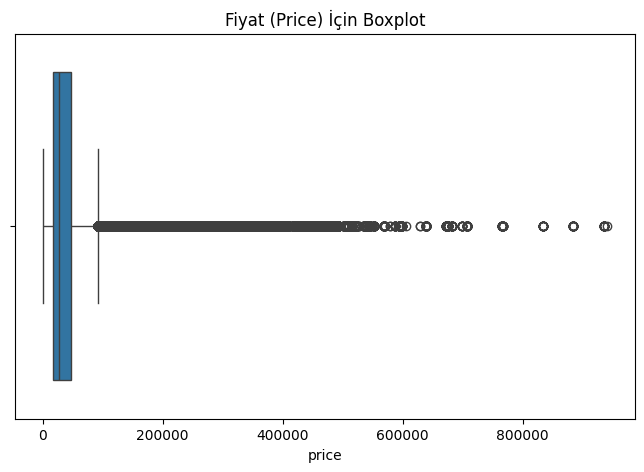

In [ ]:
import matplotlib.pyplot as plt # Outlier leri tapmaq ucun vizual qurduq
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['price'])
plt.title("Price ucun Boxplot")
plt.show()


In [ ]:
df = df[(df['price'] >= 1000) & (df['price'] <= 600000)]

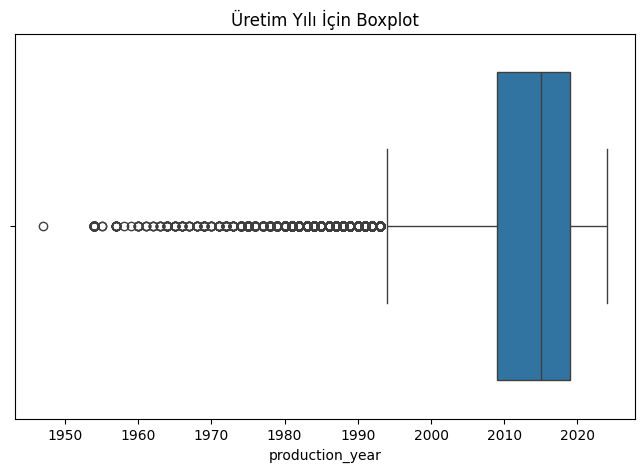

In [ ]:

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['production_year'])
plt.title("Production year ucun Boxplot")
plt.show()


In [ ]:
df = df[(df['production_year'] >= 1960) & (df['production_year'] <= 2025)]

In [ ]:
df['Hansı bazar üçün yığılıb'].fillna('Bilinmir', inplace = True)

<ipython-input-52-525eed57708a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Hansı bazar üçün yığılıb'].fillna('Bilinmir', inplace = True)


In [ ]:
df['Qəzalı'].fillna('Xeyr', inplace = True)

<ipython-input-53-543fd3cef7bc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Qəzalı'].fillna('Xeyr', inplace = True)


In [ ]:
df['Sahiblər'] = df['Sahiblər'].fillna(df['Sahiblər'].mode()[0])

In [ ]:
print(df['Yerlərin sayı'].unique())


['5' '8+' nan '3' '7' '2' '4' '6' '1']


In [ ]:
df['Yerlərin sayı'] = df['Yerlərin sayı'].astype(str).str.replace('+', '', regex=False)

In [ ]:
df['Yerlərin sayı'] = pd.to_numeric(df['Yerlərin sayı'], errors='coerce')

In [ ]:
df['Yerlərin sayı'] = df['Yerlərin sayı'].fillna(df['Yerlərin sayı'].median())

In [ ]:
df['Vəziyyəti'].fillna(df['Vəziyyəti'].mode()[0], inplace=True)

<ipython-input-59-65d560b5ad8c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Vəziyyəti'].fillna(df['Vəziyyəti'].mode()[0], inplace=True)


In [ ]:
print(df.isnull().sum())

name                        0
price                       0
city                        0
production_year             0
engine_displacement_num     0
kilometrage_num             0
Ban növü                    0
Hansı bazar üçün yığılıb    0
Marka                       0
Model                       0
Mühərrik                    0
Qəzalı                      0
Rəng                        0
Sahiblər                    0
Sürətlər qutusu             0
Vəziyyəti                   0
Yeni                        0
Yerlərin sayı               0
Ötürücü                     0
Şəhər                       0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 653280 entries, 0 to 653720
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   name                      653280 non-null  object 
 1   price                     653280 non-null  float64
 2   city                      653280 non-null  object 
 3   production_year           653280 non-null  int64  
 4   engine_displacement_num   653280 non-null  float64
 5   kilometrage_num           653280 non-null  float64
 6   Ban növü                  653280 non-null  object 
 7   Hansı bazar üçün yığılıb  653280 non-null  object 
 8   Marka                     653280 non-null  object 
 9   Model                     653280 non-null  object 
 10  Mühərrik                  653280 non-null  object 
 11  Qəzalı                    653280 non-null  object 
 12  Rəng                      653280 non-null  object 
 13  Sahiblər                  653280 non-null  object

In [ ]:
print(df.head(3))

                     name    price  city  production_year  \
0             Hyundai i30  15000.0  bakı             2008   
1  LADA (VAZ) Niva Travel  23700.0  bakı             2024   
2     Toyota Land Cruiser  60520.0  bakı             2011   

   engine_displacement_num  kilometrage_num                 Ban növü  \
0                      1.6         270000.0          Hetçbek, 5 qapı   
1                      1.7              0.0  Offroader / SUV, 5 qapı   
2                      4.0         164750.0  Offroader / SUV, 5 qapı   

  Hansı bazar üçün yığılıb       Marka         Model               Mühərrik  \
0                 Bilinmir     Hyundai           i30   1.6 L/115 a.g./Dizel   
1              Rəsmi diler  LADA (VAZ)   Niva Travel   1.7 L/80 a.g./Benzin   
2              Rəsmi diler      Toyota  Land Cruiser  4.0 L/282 a.g./Benzin   

  Qəzalı    Rəng Sahiblər Sürətlər qutusu                    Vəziyyəti  Yeni  \
0   Xeyr  Gümüşü        2        Mexaniki  Vuruğu yoxdur, rənglənməyi

In [ ]:
df.drop(columns=['name', 'Mühərrik', 'city'], inplace=True)

In [ ]:
df['Sahiblər'] = df['Yerlərin sayı'].astype(str).str.replace('+', '', regex=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 653280 entries, 0 to 653720
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   price                     653280 non-null  float64
 1   production_year           653280 non-null  int64  
 2   engine_displacement_num   653280 non-null  float64
 3   kilometrage_num           653280 non-null  float64
 4   Ban növü                  653280 non-null  object 
 5   Hansı bazar üçün yığılıb  653280 non-null  object 
 6   Marka                     653280 non-null  object 
 7   Model                     653280 non-null  object 
 8   Qəzalı                    653280 non-null  object 
 9   Rəng                      653280 non-null  object 
 10  Sahiblər                  653280 non-null  object 
 11  Sürətlər qutusu           653280 non-null  object 
 12  Vəziyyəti                 653280 non-null  object 
 13  Yeni                      653280 non-null  object

In [ ]:
df['Qəzalı'] = df['Qəzalı'].map({'Bəli': 1, 'Xeyr': 0})

In [ ]:
df['Yeni'] = df['Yeni'].map({'Bəli': 1, 'Xeyr': 0})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 653280 entries, 0 to 653720
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   price                     653280 non-null  float64
 1   production_year           653280 non-null  int64  
 2   engine_displacement_num   653280 non-null  float64
 3   kilometrage_num           653280 non-null  float64
 4   Ban növü                  653280 non-null  object 
 5   Hansı bazar üçün yığılıb  653280 non-null  object 
 6   Marka                     653280 non-null  object 
 7   Model                     653280 non-null  object 
 8   Qəzalı                    653280 non-null  int64  
 9   Rəng                      653280 non-null  object 
 10  Sahiblər                  653280 non-null  object 
 11  Sürətlər qutusu           653280 non-null  object 
 12  Vəziyyəti                 653280 non-null  object 
 13  Yeni                      653280 non-null  int64 

In [ ]:
df.corr(numeric_only= True)['price'].sort_values(ascending= False)


,price
price,1.000000
production_year,0.442916
Yeni,0.294960
engine_displacement_num,0.234940
Yerlərin sayı,0.101869
Qəzalı,-0.033542
kilometrage_num,-0.337256


In [ ]:
df['Sahiblər'] = df['Sahiblər'].astype(float)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 653280 entries, 0 to 653720
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   price                     653280 non-null  float64
 1   production_year           653280 non-null  int64  
 2   engine_displacement_num   653280 non-null  float64
 3   kilometrage_num           653280 non-null  float64
 4   Ban növü                  653280 non-null  object 
 5   Hansı bazar üçün yığılıb  653280 non-null  object 
 6   Marka                     653280 non-null  object 
 7   Model                     653280 non-null  object 
 8   Qəzalı                    653280 non-null  int64  
 9   Rəng                      653280 non-null  object 
 10  Sahiblər                  653280 non-null  float64
 11  Sürətlər qutusu           653280 non-null  object 
 12  Vəziyyəti                 653280 non-null  object 
 13  Yeni                      653280 non-null  int64 

In [ ]:
X = df.drop('price', axis = 1)
y = df['price'].copy()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Pipeline qurulmasi

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
num_cols = ['production_year', 'engine_displacement_num', 'kilometrage_num', 'Yerlərin sayı', 'Sahiblər']
cat_cols = ['Ban növü','Hansı bazar üçün yığılıb','Marka','Model','Qəzalı','Rəng',
            'Sürətlər qutusu',
            'Vəziyyəti',
            'Yeni',
            'Ötürücü',
            'Şəhər']

In [ ]:
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'missing')),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
])

In [ ]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),

    ('scaler', StandardScaler())
])

In [ ]:
transformer  = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_cols),
    ('cat_pipeline', cat_pipeline, cat_cols)
])

In [ ]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression


model_pipeline = Pipeline([
    ('transformer', transformer),
    ('pca',PCA(n_components = 5)),
    ('linreg', LinearRegression())
])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['production_year',
                                                   'engine_displacement_num',
                                                   'kilometrage_num',
                                                   'Yerlərin sayı',
                                                   'Sahiblər']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Ban növü',
                                                   'Hansı bazar üçün yığılıb',
                                                   'Marka', 'Model', 'Qəzalı',
                                                   'Rəng', 'Sürətlər qutusu',
                                                   'Vəziyyəti', 'Yeni',
                                                   'Ötürücü', 'Şəhər'])])),
                ('pca', PCA(n_components=5)), ('linreg', LinearRegression())])

In [ ]:
y_pred = model_pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model:")
print("MSE:", mse)
print("R^2:", r2)

Linear Regression Model:
MSE: 1417815005.6362422
R^2: 0.39329394284591945


In [ ]:
import numpy as np
rmse = np.sqrt(1397282295.8388264)
print("RMSE:", rmse)

RMSE: 37380.2393764249


In [ ]:
train_score = model_pipeline.score(X_train, y_train)
test_score = model_pipeline.score(X_test, y_test)

print("Linear Regression Model Scores:")
print(f"Train Score (R^2): {train_score:.4f}")
print(f"Test Score (R^2): {test_score:.4f}")


Linear Regression Model Scores:
Train Score (R^2): 0.3969
Test Score (R^2): 0.3933


#Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = Pipeline([
    ('transformer', transformer),
    ('rf', RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1))
])

In [ ]:
rf_model.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['production_year',
                                                   'engine_displacement_num',
                                                   'kilometrage_num',
                                                   'Yerlərin sayı',
                                                   'Sahiblər']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Ban növü',
                                                   'Hansı bazar üçün yığılıb',
                                                   'Marka', 'Model', 'Qəzalı',
                                                   'Rəng', 'Sürətlər qutusu',
                                                   'Vəziyyəti', 'Yeni',
                                                   'Ötürücü', 'Şəhər'])])),
                ('rf',
                 RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=-1,
                                       random_state=42))])

In [ ]:
y_pred_rf = rf_model.predict(X_test)

In [ ]:
rf_score = rf_model.score(X_test, y_test)
print(f"Random Forest R² Score: {rf_score:.4f}")

Random Forest R² Score: 0.9391


In [ ]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Model Performansı:")
print(f"MSE: {mse_rf:.2f}")
print(f"R²: {r2_rf:.4f}")

Random Forest Model Performansı:
MSE: 142316763.95
R²: 0.9391


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = Pipeline([
    ('transformer', transformer),
    ('gb', GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=5, random_state=42))
])

In [ ]:
gb_model.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['production_year',
                                                   'engine_displacement_num',
                                                   'kilometrage_num',
                                                   'Yerlərin sayı',
                                                   'Sahiblər']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Ban növü',
                                                   'Hansı bazar üçün yığılıb',
                                                   'Marka', 'Model', 'Qəzalı',
                                                   'Rəng', 'Sürətlər qutusu',
                                                   'Vəziyyəti', 'Yeni',
                                                   'Ötürücü', 'Şəhər'])])),
                ('gb',
                 GradientBoostingRegressor(max_depth=5, n_estimators=50,
                                           random_state=42))])

In [ ]:
gb_score = gb_model.score(X_test, y_test)
print(f"Gradient Boosting R² Score: {gb_score:.4f}")

Gradient Boosting R² Score: 0.9305


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, scoring='r2', cv=5, n_jobs=-1)
grid_search.fit(X_train_transformed, y_train)

print("Best parameters:", grid_search.best_params_)

best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_transformed)

mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print("Hyperparameter Tuned Random Forest Results:")
print(f"MSE: {mse_best_rf:.2f}")
print(f"R²: {r2_best_rf:.4f}")


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, scoring='r2', cv=5, n_jobs=-1)
grid_search.fit(X_train_transformed, y_train)

print("Best parameters:", grid_search.best_params_)

best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_transformed)

mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print("Hyperparameter Tuned Random Forest Results:")
print(f"MSE: {mse_best_rf:.2f}")
print(f"R²: {r2_best_rf:.4f}")